In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split



In [3]:
df = pd.read_csv('insurancedata.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


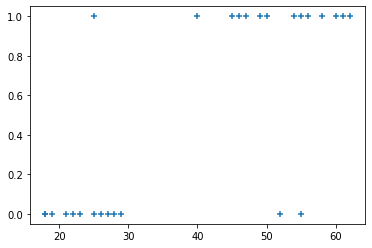

In [4]:
plt.scatter(df.age, df.bought_insurance, marker='+')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1)

In [6]:
X_test

,age
26,23
15,55
7,60


Import Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
model.predict(X_test)

array([0, 1, 1], dtype=int64)

In [11]:
y_test

26    0
15    1
7     1
Name: bought_insurance, dtype: int64

In [12]:
model.score(X_test,y_test)

1.0

Probability that the dataset will be in either class


In [13]:
model.predict_proba(X_test)

array([[0.88260178, 0.11739822],
       [0.11622899, 0.88377101],
       [0.06532564, 0.93467436]])

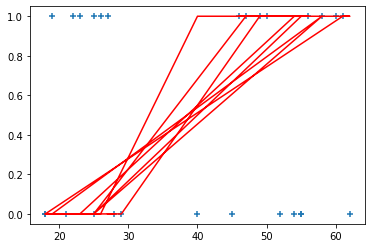

In [14]:
plt.scatter(df.age.sort_values(), df.bought_insurance, marker='+')
plt.plot(df.age, model.predict(df[['age']]), color='red')

# Exercise


In [15]:
df = pd.read_csv('hrdata.csv')
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Which variables have direct impact on retention?

In [16]:
import seaborn as sns

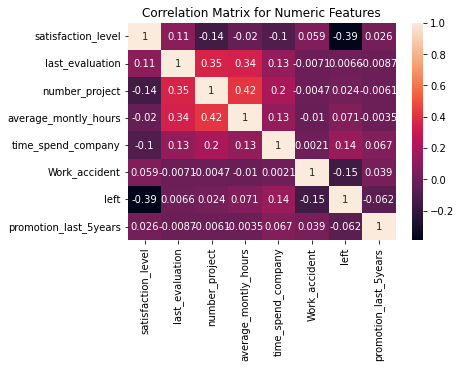

In [17]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.show()

In [22]:
average_time = df['time_spend_company'].mean()
average_time

3.498233215547703

In [23]:
left = df[df.left==1]
left.shape

(3571, 10)

In [24]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [25]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

## Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

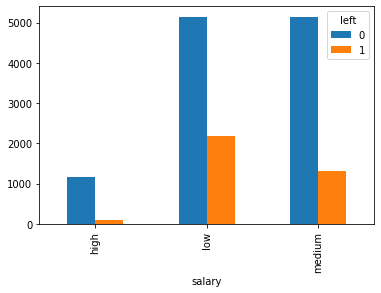

In [26]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

## Department wise employee retention rate

<AxesSubplot:xlabel='Department'>

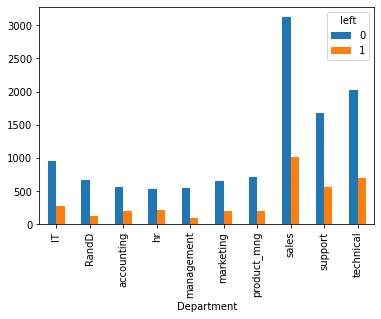

In [27]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

## From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

In [29]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


### Tackle salary dummy variable

In [30]:
# Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [31]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [32]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [33]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [34]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [35]:
y = df.left

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.4)

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [59]:
model.fit(X_train, y_train)

LogisticRegression()

In [60]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Accuracy of the model

In [61]:
model.score(X_test,y_test)

0.782